## Getting Started with Turtle

[Turtle](https://docs.python.org/3/library/turtle.html) is a library that is primarily used to introduce kids to programming. The former pointer looked like a turtle. The main idea with the library is that we can send the turtle (or pointer) over the flat plane by feeding it commands or coordinates. In that way we can draw lines, shapes and all kinds of forms. 

In the following steps I will walk you through the basics of ipyturtle, which is a Turtle version that can run directly in Jupyter notebooks.
Here we import the library and initiate the Turtle object. You should see a window popping up.

In [27]:
from ipyturtle import Turtle
t = Turtle()
t

Turtle()

There are countless way to let it snow in Turtle. In this examples we will have a look at generating snowflakes with fractals by using the definition of [Koch's Snowflake](http://gofiguremath.org/fractals/koch-snowflake/).

The rule to define a Koch snowflake is:
- devide a straight line into 3 parts
- replace the middle part with an equilateral triangle (all sites have the same length and the angle between sites it 60 degrees) 

The simplest example look like this in code:

In [28]:
length = 150
length_side = length/3

#rotating to make it easier to understand
t.right(90)

t.forward(length_side) 
t.left(60)
t.forward(length_side)
t.right(120)
t.forward(length_side) 
t.left(60) 
t.forward(length_side) 

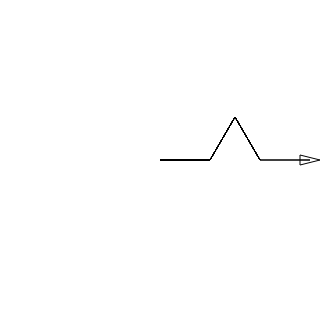

This is a good start, but we want to get a snowflake and not a line...
We can use a loop to iterate until we come back to our starting point.
A circle has an inner angle of 120degrees, so to fill up the star, we need 3 iterations, since we are rotating 120 degrees after each implementation of the Koch rule 
 
    


In [36]:
def iterate_koch(length):
    length_side = length/3
    t.forward(length_side) 
    t.left(60)
    t.forward(length_side)
    t.right(120)
    t.forward(length_side) 
    t.left(60) 
    t.forward(length_side) 
t.reset()
for i in range(3):
    iterate_koch(length)
    t.right(120)


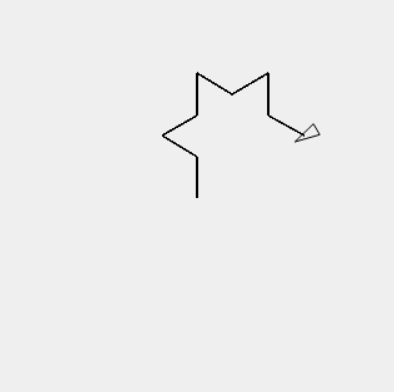


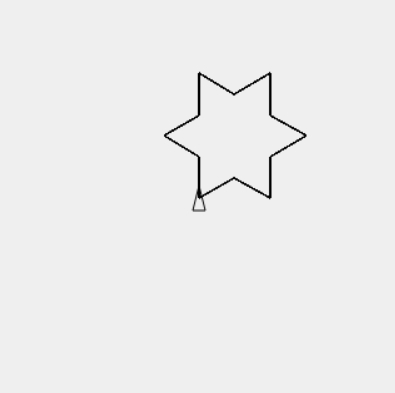

Now we have a star and the backbone for our fractal.
Fractal are repeating structures, so no matter how far you zoom in, you will always see the similar structure.
Instead of drawing the fractal all at once, we can split it up into smaller pieces. 
A way to generate those pieces is by using recursion.

Recursive function call themselves with different values. Usually there is an exit condition since the programme would otherwise run forever and eventually run out of memory on your computer.
Recursion sounds a bit confusing, but it will get clearer when we look at the shapes we get 

In [39]:
def snowflake(lengthSide, levels): 
    """Draw Koch snowflake
    length_side: initial length of the line we want to draw a triangle in
    levels: how often the rule should be applied on one side or how much detail the snowflake should get
    
    """
    
    if levels == 0:  # this is our exit condition
        t.forward(lengthSide) 
        return
    lengthSide = lengthSide/3
    snowflake(lengthSide, levels-1) 
    t.left(60) 
    snowflake(lengthSide, levels-1) 
    t.right(120) 
    snowflake(lengthSide, levels-1) 
    t.left(60) 
    snowflake(lengthSide, levels-1) 
    
def draw_one_flake(length, level):
    """Drawing a whole snowflake and arriving back at the starting point."""
    t.pendown()            
    for i in range(3):     
        snowflake(length, level) 
        t.right(120)
    t.penup()

In [40]:
# With Level 1 our function draws a star
t.reset()
draw_one_flake(100, 1)

In [41]:
# With Level 2 we get a more snowflake-like structure
t.reset()
draw_one_flake(100, 2)

In [43]:
# From Level 3 on we get a snowflake
# this step takes much more time, since we have much more lines to draw
t.reset()
draw_one_flake(100, 4)

In [44]:
# A small thinking exercise: What does level 0 draw?
t.reset()
draw_one_flake(100, 0)

There a couple of fun math calculations one can do with fractals. For example calculating the perimeter of the snowflake when levels get infinite. Spoiler alert: 3 * s * (4/3) ** n Think about how many segments we are adding in each iteration... 


But there are more fun things that we can do in Turtle as well putting maths aside. 
For example drawing more snowflakes and adding colors!!! 

In [46]:
t.reset()
length = 60.0   
level = 2
t.pencolor('Blue')
t.hideturtle()

for color in ["Red", "Blue", "Green", "Red", "Black", "Yellow"]:
    t.pencolor(color)
    draw_one_flake(length, level)
    t.left(120)
    t.forward(length/3)
    t.right(60)
    t.forward(length/3)
    

Now the sky is the limit... 
ipyturtle does not provide the whole range of functions compared to Turtle. Still it is a good starting point to try it out. I made a similar version of this notebook but with Turtle functions and added one method that can fill the whole are of the screen with snowflakes.